In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
guess_df = pd.read_csv("guessed_resources.csv")
guess_df = guess_df[guess_df['n'] < 14]

In [3]:
guess_df

,n,q,width,depth,tc,td,h,cnot
0,5,4,10,1280,640,192,224,1280
1,6,5,12,3456,1664,512,576,3328
2,7,6,14,8704,4096,1280,1408,8192
3,8,7,16,20992,9728,3072,3328,19456
4,9,8,18,49152,22528,7168,7680,45056
5,10,9,20,112640,51200,16384,17408,102400
6,11,10,22,253952,114688,36864,38912,229376
7,12,11,24,565248,253952,81920,86016,507904
8,13,12,26,1245184,557056,180224,188416,1114112


In [4]:
experiment_df = pd.read_csv("exorcised_resources.csv")
experiment_df = experiment_df[experiment_df['n'] < 14]

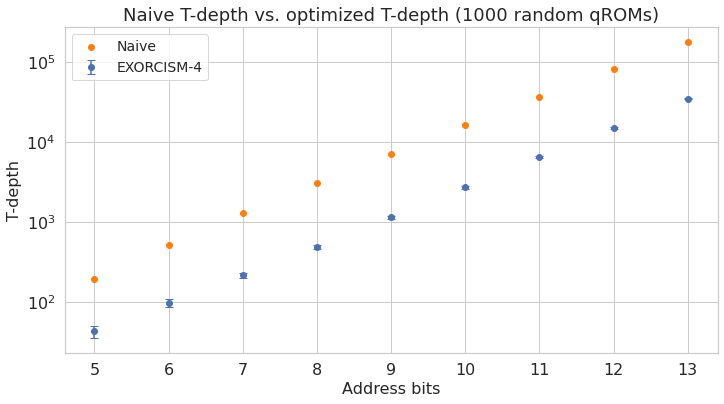

In [5]:
sns.set(rc={'figure.figsize':(11.7,6)})
sns.set_style('whitegrid')

groups = experiment_df.groupby('n')
means = groups.mean()['td'].to_numpy()
std = groups.std()['td'].to_numpy()

plt.errorbar(guess_df['n'], means, yerr=std, capsize=4, fmt='o', label="EXORCISM-4")
plt.scatter(guess_df['n'], guess_df.groupby('n').mean()['td'], label="Naive", color="tab:orange")
plt.legend()

plt.xlabel("Address bits", fontsize=16)
plt.ylabel("T-depth", fontsize=16)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Naive T-depth vs. optimized T-depth (1000 random qROMs)", fontsize=18)

plt.legend(fontsize=14)
plt.savefig("exorcism-t-depth.pdf")

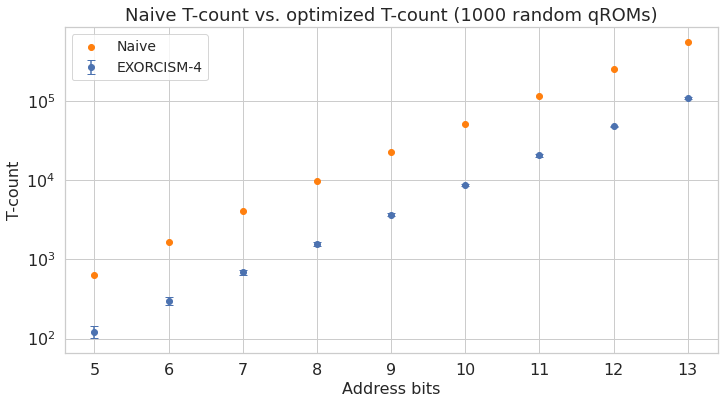

In [6]:
sns.set(rc={'figure.figsize':(11.7,6)})
sns.set_style('whitegrid')

groups = experiment_df.groupby('n')
means = groups.mean()['tc'].to_numpy()
std = groups.std()['tc'].to_numpy()

plt.errorbar(guess_df['n'], means, yerr=std, capsize=4, fmt='o', label="EXORCISM-4")
plt.scatter(guess_df['n'], guess_df.groupby('n').mean()['tc'], label="Naive", color="tab:orange")
plt.legend()

plt.xlabel("Address bits", fontsize=16)
plt.ylabel("T-count", fontsize=16)
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("Naive T-count vs. optimized T-count (1000 random qROMs)", fontsize=18)

plt.legend(fontsize=14)
plt.savefig('exorcism-t-count.pdf')